In [1]:
# 배열의 크기, 반복 횟수 설정
sizes = [
    100, 250, 500, 750, 
    1000, 2500, 5000, 7500, 
    10000, 25000, 50000, 75000, 
    100000, 250000, 500000, 750000,
    1000000
]  # 배열의 크기

SIZE = sizes[12] # 100,000
THRESHODE_RANGE = 250
iterations = 5 # 각 크기별 평균을 내기 위해 반복할 횟수

thresholds = list(range(THRESHODE_RANGE)) # threshold의 범위를 0 ~ 249까지 지정
''' 
    c로 만든 두 가지 정렬(normal Quicksort, threshold used Quicksort)의 시간을 구해 파일에 추가하는 어플리케이션을
    위 두 가지 sizes, iterations을 사용하여, 반복해서 값을 구한다.
'''
for threshold in thresholds:
    for _ in range(iterations):
        !../main.out {SIZE} {threshold}

Qiucksort: elapsed time: 11 milliseconds
threshold used Qiucksort: elapsed time: 11 milliseconds
Qiucksort: elapsed time: 10 milliseconds
threshold used Qiucksort: elapsed time: 11 milliseconds
Qiucksort: elapsed time: 12 milliseconds
threshold used Qiucksort: elapsed time: 13 milliseconds
Qiucksort: elapsed time: 12 milliseconds
threshold used Qiucksort: elapsed time: 11 milliseconds
Qiucksort: elapsed time: 11 milliseconds
threshold used Qiucksort: elapsed time: 12 milliseconds
Qiucksort: elapsed time: 11 milliseconds
threshold used Qiucksort: elapsed time: 11 milliseconds
Qiucksort: elapsed time: 12 milliseconds
threshold used Qiucksort: elapsed time: 11 milliseconds
Qiucksort: elapsed time: 11 milliseconds
threshold used Qiucksort: elapsed time: 10 milliseconds
Qiucksort: elapsed time: 10 milliseconds
threshold used Qiucksort: elapsed time: 10 milliseconds
Qiucksort: elapsed time: 10 milliseconds
threshold used Qiucksort: elapsed time: 10 milliseconds
Qiucksort: elapsed time: 10 mi

In [2]:
'''
    위에서 구한 정렬 시간을 저장한 파일을 가져와서 딕셔너리에 담는다.
'''
# 시간의 합을 저장할 딕셔너리 컨테이너
threshold_used_sort_times = {}

# c 어플리케이션 main.out으로 생성, 추가된 파일 'Quicksort_threshold.txt'를 가져와 한 줄 씩 읽는다.
with open('Quicksort_threshold.txt', 'r') as f:
    # '/n'문자을 기준으로 한 줄씩 가져와 읽는다.
    for line in f:
        size, threshold, quick_sort_time, threshold_used_sort_time = map(int, line.strip().split()) 
                                                                    # .strip(): 양쪽 '\n'문자 제거 
                                                                    # .split(): ' '를 기준으로, 토큰화
        # 딕셔너리 컨테이너에 있는지 현재 크기의 시간 데이터가 있는지 확인
        # 없으면 추가                                            
        if threshold_used_sort_times.get(threshold) == None:
            threshold_used_sort_times[threshold] = threshold_used_sort_time
        # 있으면 합쳐준다.
        else:
            threshold_used_sort_times[threshold] += threshold_used_sort_time
            
# 결과 각 sizes(N)의 배열을 정렬할 때 걸리는 시간의 합을 저장하는 딕셔너리를 얻을 수 있다.
print(f"threshold_used_sort_times: {threshold_used_sort_times}")

threshold_used_sort_times: {0: 58, 1: 52, 2: 55, 3: 64, 4: 53, 5: 53, 6: 59, 7: 52, 8: 60, 9: 53, 10: 54, 11: 58, 12: 58, 13: 60, 14: 55, 15: 54, 16: 49, 17: 60, 18: 57, 19: 49, 20: 47, 21: 51, 22: 51, 23: 48, 24: 52, 25: 50, 26: 49, 27: 57, 28: 50, 29: 58, 30: 56, 31: 54, 32: 52, 33: 49, 34: 49, 35: 65, 36: 51, 37: 48, 38: 51, 39: 49, 40: 53, 41: 54, 42: 49, 43: 50, 44: 52, 45: 52, 46: 48, 47: 55, 48: 53, 49: 49, 50: 50, 51: 57, 52: 50, 53: 54, 54: 51, 55: 51, 56: 59, 57: 52, 58: 48, 59: 55, 60: 69, 61: 58, 62: 67, 63: 53, 64: 48, 65: 50, 66: 52, 67: 51, 68: 59, 69: 51, 70: 51, 71: 54, 72: 52, 73: 67, 74: 55, 75: 53, 76: 60, 77: 56, 78: 55, 79: 52, 80: 52, 81: 52, 82: 54, 83: 73, 84: 55, 85: 53, 86: 56, 87: 55, 88: 57, 89: 63, 90: 57, 91: 54, 92: 54, 93: 52, 94: 51, 95: 58, 96: 55, 97: 51, 98: 58, 99: 66, 100: 57, 101: 52, 102: 53, 103: 59, 104: 61, 105: 59, 106: 51, 107: 54, 108: 60, 109: 54, 110: 55, 111: 55, 112: 55, 113: 58, 114: 58, 115: 57, 116: 55, 117: 58, 118: 57, 119: 54, 12

In [3]:
# 딕셔너리에 저장된 정렬 시간의 평균을 구하는 함수
def average(times: dict, iterations: int) -> list:
    time_average_list: list = []
    for size, sum_time in times.items():
        average: float = sum_time / iterations
        time_average_list.append(average)
    return time_average_list

In [4]:
# quick_sort_average = average(quick_sort_times, iterations)
threshold_used_sort_average = average(threshold_used_sort_times, iterations)

# print(f"quick_sort_average: {quick_sort_average}")
print(f"threshold_used_sort_average: {threshold_used_sort_average}")

threshold_used_sort_average: [11.6, 10.4, 11.0, 12.8, 10.6, 10.6, 11.8, 10.4, 12.0, 10.6, 10.8, 11.6, 11.6, 12.0, 11.0, 10.8, 9.8, 12.0, 11.4, 9.8, 9.4, 10.2, 10.2, 9.6, 10.4, 10.0, 9.8, 11.4, 10.0, 11.6, 11.2, 10.8, 10.4, 9.8, 9.8, 13.0, 10.2, 9.6, 10.2, 9.8, 10.6, 10.8, 9.8, 10.0, 10.4, 10.4, 9.6, 11.0, 10.6, 9.8, 10.0, 11.4, 10.0, 10.8, 10.2, 10.2, 11.8, 10.4, 9.6, 11.0, 13.8, 11.6, 13.4, 10.6, 9.6, 10.0, 10.4, 10.2, 11.8, 10.2, 10.2, 10.8, 10.4, 13.4, 11.0, 10.6, 12.0, 11.2, 11.0, 10.4, 10.4, 10.4, 10.8, 14.6, 11.0, 10.6, 11.2, 11.0, 11.4, 12.6, 11.4, 10.8, 10.8, 10.4, 10.2, 11.6, 11.0, 10.2, 11.6, 13.2, 11.4, 10.4, 10.6, 11.8, 12.2, 11.8, 10.2, 10.8, 12.0, 10.8, 11.0, 11.0, 11.0, 11.6, 11.6, 11.4, 11.0, 11.6, 11.4, 10.8, 13.2, 11.0, 12.0, 11.4, 11.2, 16.0, 13.6, 11.4, 12.6, 21.0, 12.8, 14.0, 10.8, 11.2, 12.4, 13.4, 12.2, 11.8, 11.8, 13.0, 12.0, 11.6, 12.4, 13.4, 12.2, 11.4, 12.8, 13.0, 12.2, 12.4, 11.6, 14.2, 12.4, 11.8, 13.4, 11.6, 12.8, 14.2, 12.4, 12.2, 11.8, 12.6, 12.6, 13.8, 

/var/folders/bc/f500d0zj7m1cdn01yb_3k7bm0000gn/T/ipykernel_50513/1582433447.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


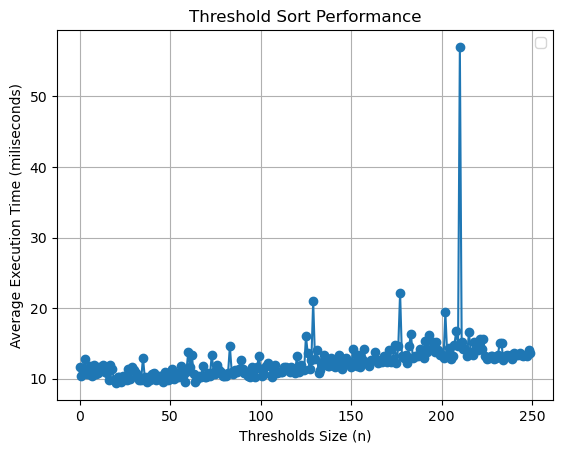

In [5]:
import matplotlib.pyplot as plt
# 데이터를 그래프로 그려주는 라이브러리 설치 필요
# 결과 그래프 그리기
'''
    그래프 정보
    배열의 크기: 100,000, 임계값: 0-249 반복횟수: 5       
'''
# x, y 각 데이터는 list 혹은 Numpy array 형태여야 한다.
thresholds = list(range(len(threshold_used_sort_average)))
plt.plot(thresholds, threshold_used_sort_average, marker='o')
plt.xlabel('Thresholds Size (n)')
plt.ylabel('Average Execution Time (miliseconds)')
plt.title('Threshold Sort Performance')
plt.legend()
plt.grid(True)
plt.show()

In [6]:
# 그래프의 범위를 좁혀 유의미한 임계값의 범위를 찾아간다.
thresholds = thresholds[:100] 
threshold_used_sort_average = threshold_used_sort_average[:100]

/var/folders/bc/f500d0zj7m1cdn01yb_3k7bm0000gn/T/ipykernel_50513/145890736.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


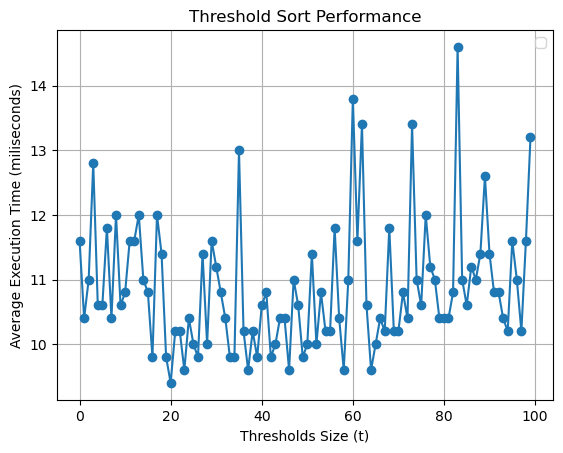

In [7]:
import matplotlib.pyplot as plt
# 데이터를 그래프로 그려주는 라이브러리 설치 필요
# 결과 그래프 그리기
'''
    그래프 정보
    배열의 크기: 100,000, 임계값: 0-(100 - 1) 반복횟수: 5        
'''
# x, y 각 데이터는 list 혹은 Numpy array 형태여야 한다.
thresholds = list(range(len(threshold_used_sort_average)))
plt.plot(thresholds, threshold_used_sort_average, marker='o')
plt.xlabel('Thresholds Size (t)')
plt.ylabel('Average Execution Time (miliseconds)')
plt.title('Threshold Sort Performance')
plt.legend()
plt.grid(True)
plt.show()